<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 185.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 205.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 118.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 163.9 MB/s eta 0:00:00


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
# Shape of the dataset
df.shape

(65437, 114)

In [4]:
# Column names
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [5]:
# Info about datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [6]:
# Descriptive summary for all columns
df.describe(include='all')

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
count,65437.000000,65437,65437,65437,54806,65437,54466,60784,60488,49237,...,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,56182,56238,2.343500e+04,29126.000000
unique,NaN,5,8,110,3,1,118,8,418,10853,...,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
top,NaN,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
freq,NaN,50207,23911,39041,23015,65437,9993,24942,3674,603,...,NaN,NaN,NaN,NaN,NaN,NaN,38767,30071,NaN,NaN
mean,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,NaN,NaN,8.615529e+04,6.935041
std,18890.179119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,NaN,NaN,1.867570e+05,2.088259
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1.000000e+00,0.000000
25%,16360.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,3.271200e+04,6.000000
50%,32719.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,NaN,NaN,6.500000e+04,7.000000
75%,49078.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,NaN,NaN,1.079715e+05,8.000000


### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [10]:
import numpy as np

In [11]:
# 1. Identify Missing Values
# Count of missing values per column
print("Missing Count per Column:\n")
print(df.isnull().sum())

# Percentage of missing values per column
print("\nMissing Percentage per Column:\n")
print((df.isnull().sum() / len(df)) * 100)

# 2. Handle Missing Values
# Strategy:
# - For categorical columns → fill with mode
# - For numeric columns → fill with median

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Impute numeric columns with median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])


Missing Count per Column:

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Missing Percentage per Column:

ResponseId              0.000000
MainBranch              0.000000
Age                     0.000000
Employment              0.000000
RemoteWork             16.246160
                         ...    
JobSatPoints_11        55.002522
SurveyLength           14.143375
SurveyEase             14.057796
ConvertedCompYearly    64.186928
JobSat                 55.490013
Length: 114, dtype: float64


In [12]:
# 3. Verify Missing Values Resolved

print("\nMissing Values After Imputation:\n")
print(df.isnull().sum())


Missing Values After Imputation:

ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [13]:
# 1. Value counts for Employment
print("\nEmployment Distribution:")
print(df['Employment'].value_counts(dropna=False))

# 2. Value counts for Job Satisfaction (JobSat)
print("\nJobSat (Job Satisfaction) Distribution:")
print(df['JobSat'].value_counts(dropna=False))

# 3. Value counts for Professional Coding Experience (YearsCodePro)
print("\nYearsCodePro Distribution:")
print(df['YearsCodePro'].value_counts(dropna=False))


Employment Distribution:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking f

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


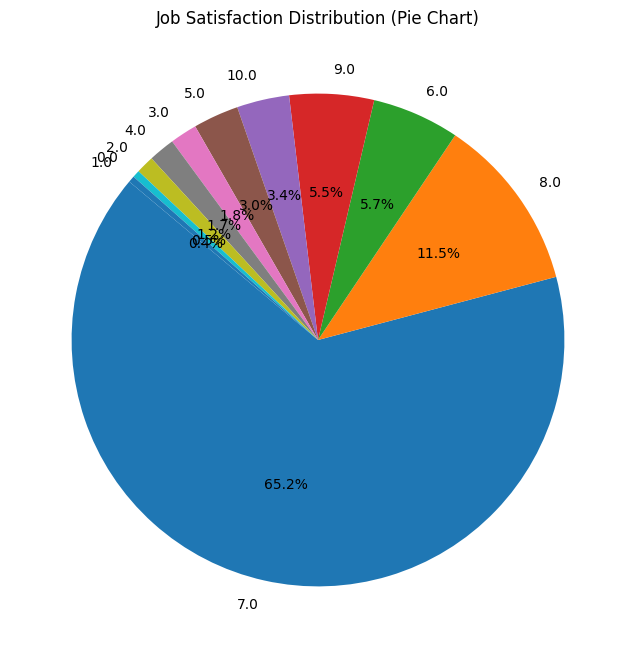

In [14]:
# Value counts for JobSat
job_sat_counts = df['JobSat'].value_counts()
job_sat_pct = df['JobSat'].value_counts(normalize=True) * 100

# -------------------------
# 1. Pie Chart
# -------------------------
plt.figure(figsize=(8, 8))
plt.pie(job_sat_counts, labels=job_sat_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Job Satisfaction Distribution (Pie Chart)")
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [17]:
print(df['LanguageHaveWorkedWith'].head())
print(df['LanguageWantToWorkWith'].head())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: LanguageHaveWorkedWith, dtype: object
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: LanguageWantToWorkWith, dtype: object


IndexError: index 0 is out of bounds for axis 0 with size 0

<Figure size 1400x800 with 0 Axes>

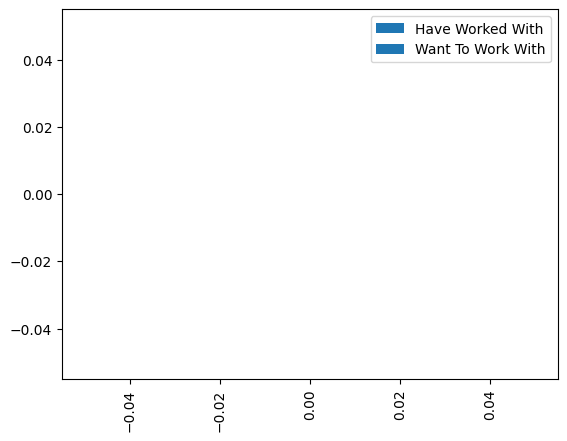

In [16]:
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';')
df['LanguageWantToWorkWith'] = df['LanguageWantToWorkWith'].str.split(';')

# Count languages in "have worked with"
have_counts = df['LanguageHaveWorkedWith'].explode().value_counts()

# Count languages in "want to work with"
want_counts = df['LanguageWantToWorkWith'].explode().value_counts()


lang_compare = pd.DataFrame({
    'Have Worked With': have_counts,
    'Want To Work With': want_counts
}).fillna(0)  # Fill languages missing in one side with 0


# Plot
plt.figure(figsize=(14, 8))
lang_compare.sort_values('Have Worked With', ascending=False).head(15).plot(
    kind='bar',
    width=0.8
)
plt.title("Top 15 Programming Languages: Worked With vs Want To Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


/tmp/ipykernel_299/394599753.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Region'] = df['Country'].map(region_map).fillna('Other')


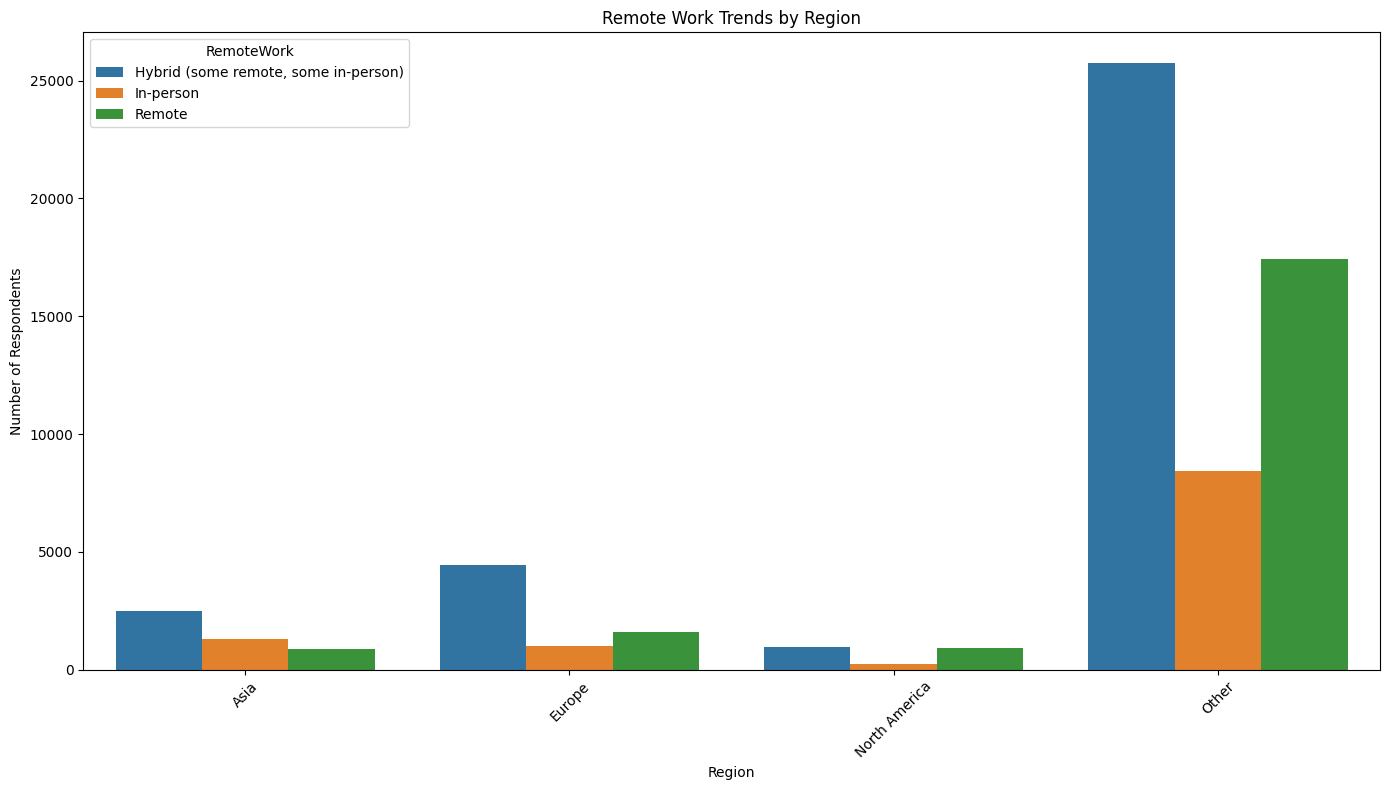

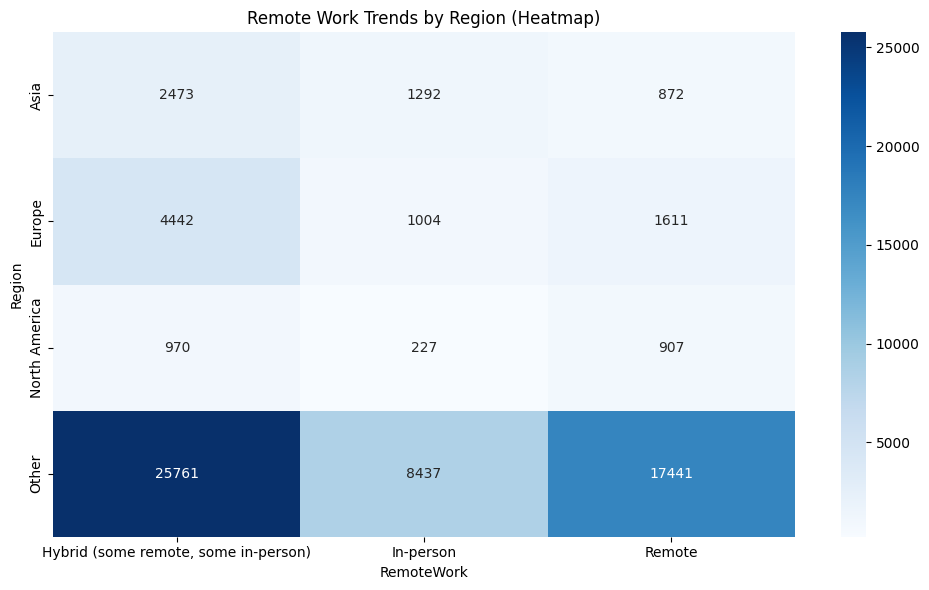

In [23]:
# 1. Create a Region column if it does NOT exist
# ---------------------------------------------------------
if 'Region' not in df.columns:
    # Simple country → region mapping (example)
    region_map = {
        'United States': 'North America',
        'Canada': 'North America',
        'India': 'Asia',
        'China': 'Asia',
        'United Kingdom': 'Europe',
        'Germany': 'Europe',
        'France': 'Europe',
        # Add more if needed...
    }
    
    df['Region'] = df['Country'].map(region_map).fillna('Other')

# ---------------------------------------------------------
# 2. Check RemoteWork distribution by region
# ---------------------------------------------------------
remote_region = df.groupby(['Region', 'RemoteWork']).size().reset_index(name='Count')

# ---------------------------------------------------------
# 3. Grouped bar chart
# ---------------------------------------------------------
plt.figure(figsize=(14, 8))
sns.barplot(
    data=remote_region,
    x='Region',
    y='Count',
    hue='RemoteWork'
)

plt.title("Remote Work Trends by Region")
plt.xlabel("Region")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 4. Optional heatmap version
# ---------------------------------------------------------
pivot_data = remote_region.pivot(index='Region', columns='RemoteWork', values='Count')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, annot=True, fmt='g', cmap='Blues')
plt.title("Remote Work Trends by Region (Heatmap)")
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [24]:
# 1. Prepare ordinal encoding for JobSat
job_sat_map = {
    'Very dissatisfied': 1,
    'Slightly dissatisfied': 2,
    'Neither satisfied nor dissatisfied': 3,
    'Slightly satisfied': 4,
    'Very satisfied': 5
}

# Encode JobSat → numeric
df['JobSat_Encoded'] = df['JobSat'].map(job_sat_map)

# Remove rows where JobSat or YearsCodePro is missing
filtered_df = df[['JobSat_Encoded', 'YearsCodePro']].dropna()

# 2. Pearson Correlation
pearson_corr = filtered_df.corr(method='pearson')

# 3. Spearman Correlation (better for ordinal data)
spearman_corr = filtered_df.corr(method='spearman')

print("Pearson Correlation:")
print(pearson_corr)

print("\nSpearman Correlation:")
print(spearman_corr)

Pearson Correlation:
                JobSat_Encoded  YearsCodePro
JobSat_Encoded             NaN           NaN
YearsCodePro               NaN           NaN

Spearman Correlation:
                JobSat_Encoded  YearsCodePro
JobSat_Encoded             NaN           NaN
YearsCodePro               NaN           NaN


/tmp/ipykernel_299/1653023072.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['JobSat_Encoded'] = df['JobSat'].map(job_sat_map)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Cross-tabulation (Employment vs EdLevel):
EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                              

/tmp/ipykernel_299/3995902925.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x800 with 0 Axes>

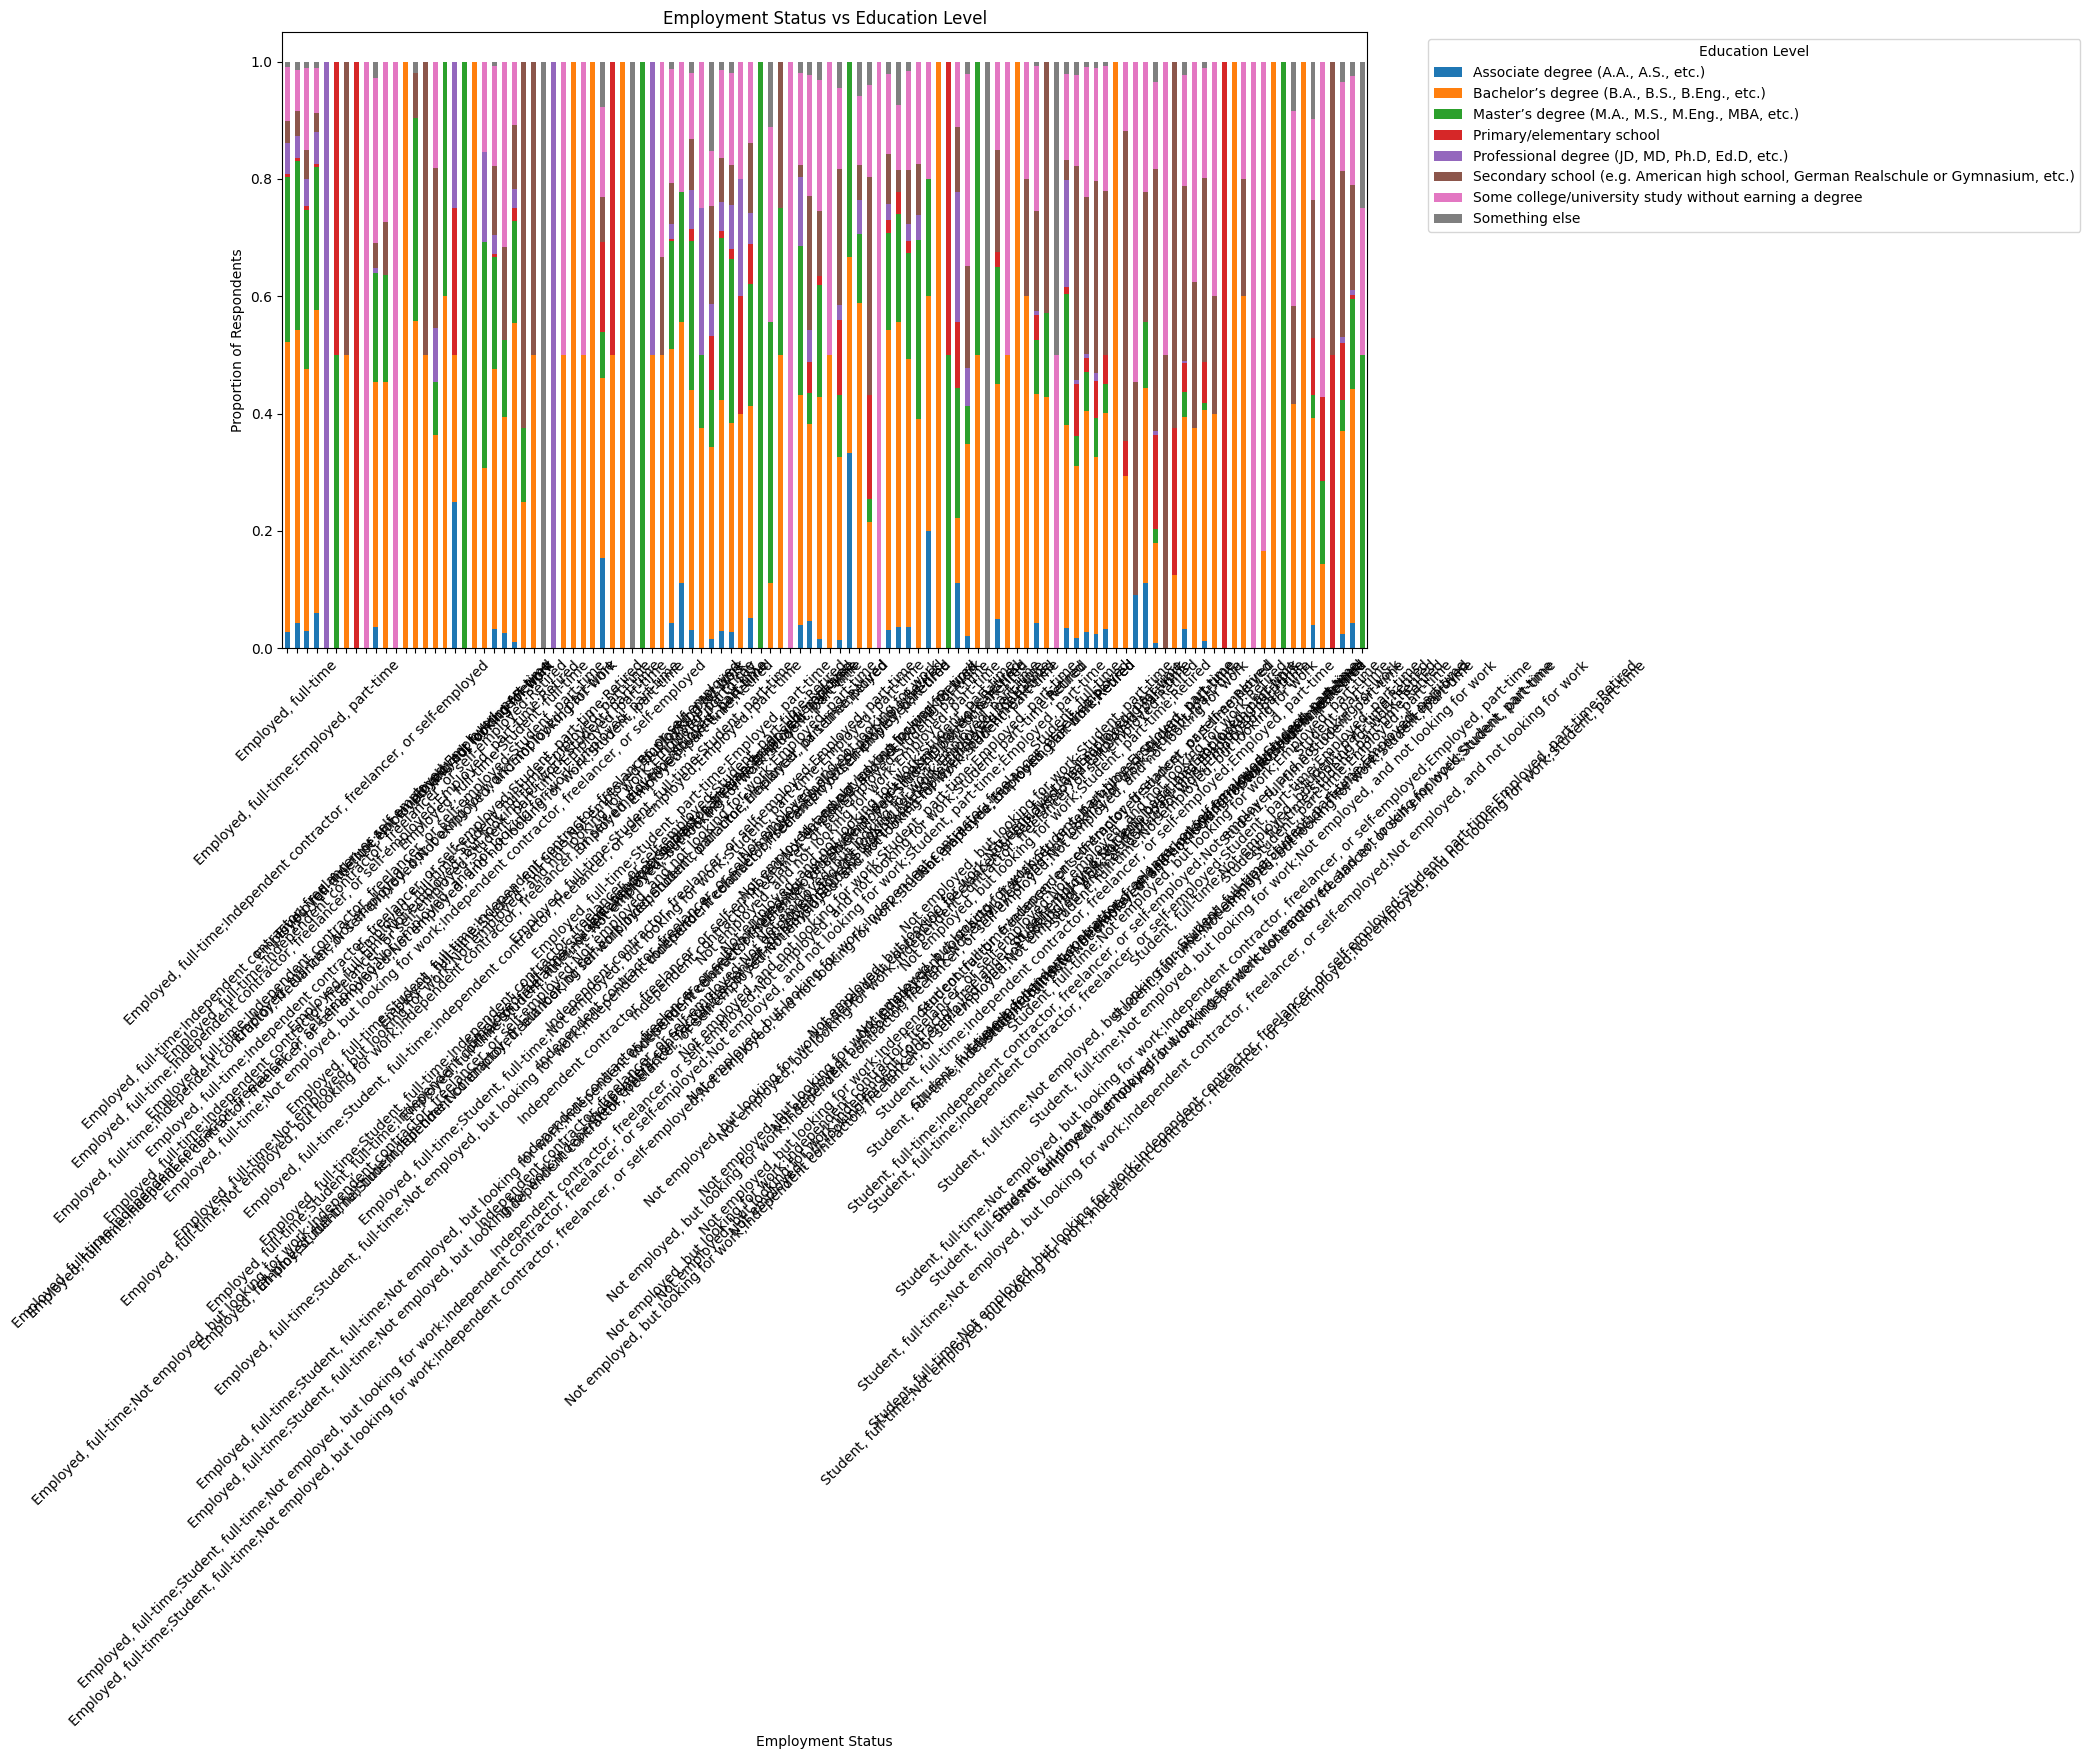

In [25]:
# 1. Create the cross-tab table
ct = pd.crosstab(df['Employment'], df['EdLevel'])

print("Cross-tabulation (Employment vs EdLevel):")
print(ct)

# 2. Normalize rows (optional: easier to visualize)
ct_norm = ct.div(ct.sum(axis=1), axis=0)

# 3. Stacked bar plot
plt.figure(figsize=(14, 8))
ct_norm.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title("Employment Status vs Education Level")
plt.xlabel("Employment Status")
plt.ylabel("Proportion of Respondents")
plt.xticks(rotation=45)
plt.legend(title="Education Level", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [26]:
# Save the cleaned DataFrame as a CSV file
df.to_csv("cleaned_survey_data.csv", index=False)

print("Cleaned dataset has been successfully saved as 'cleaned_survey_data.csv'.")

Cleaned dataset has been successfully saved as 'cleaned_survey_data.csv'.


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
